In [18]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
data_dir = '/content/drive/MyDrive/dogs-vs-cats/train'
categories = ['cats', 'dogs']

In [20]:
def load_images(data_dir, categories, img_size=(128, 128)):
    data = []
    labels = []
    for category in categories:
        path = os.path.join(data_dir, category)
        label = categories.index(category)
        for img_name in os.listdir(path):
            try:
                img_path = os.path.join(path, img_name)
                img = cv2.imread(img_path, cv2.IMREAD_COLOR)
                img = cv2.resize(img, img_size)
                data.append(img)
                labels.append(label)
            except Exception as e:
                print(f"Error loading image {img_name}: {e}")
    return np.array(data), np.array(labels)

In [21]:
img_size = (128, 128)
data, labels = load_images(data_dir, categories, img_size)

In [22]:
data = data / 255.0
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [23]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [24]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_flat, y_train)

SVC(kernel='linear')

In [25]:
y_pred = svm_model.predict(X_test_flat)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.61


In [26]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=categories))

Classification Report:
              precision    recall  f1-score   support

        cats       0.67      0.62      0.65        64
        dogs       0.54      0.58      0.56        48

    accuracy                           0.61       112
   macro avg       0.60      0.60      0.60       112
weighted avg       0.61      0.61      0.61       112



In [27]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[40 24]
 [20 28]]


In [11]:
svm_model = SVC(kernel='rbf')  # or 'poly'
svm_model.fit(X_train_flat, y_train)

SVC()

In [12]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'poly']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train_flat, y_train)
print(grid.best_params_)
svm_model = grid.best_estimator_

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  11.9s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  12.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   8.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  10.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  12.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   5.6s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  10.6s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   6.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  10.8s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   5.4s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  13.2s
[CV] END .......................C=0.1, gamma=0.

In [13]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

In [14]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
X_train_features = base_model.predict(preprocess_input(X_train))
X_test_features = base_model.predict(preprocess_input(X_test))

X_train_features_flat = X_train_features.reshape(X_train_features.shape[0], -1)
X_test_features_flat = X_test_features.reshape(X_test_features.shape[0], -1)

svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_features_flat, y_train)

14/14 ━━━━━━━━━━━━━━━━━━━━ 84s 6s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step


SVC()

In [15]:
img_size = (224, 224)
data, labels = load_images(data_dir, categories, img_size)

In [16]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm_model, X_train_flat, y_train, cv=5)
print(f"Cross-Validation Accuracy: {np.mean(scores):.2f}")

Cross-Validation Accuracy: 0.52


In [16]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
svm_model = SVC(kernel='rbf', class_weight='balanced')
svm_model.fit(X_train_flat, y_train)

In [34]:
import pickle

# Assuming svm_model is your trained model
with open('/content/drive/MyDrive/svm_model.pkl', 'wb') as model_file:
    pickle.dump(svm_model, model_file)


The image is a dog.


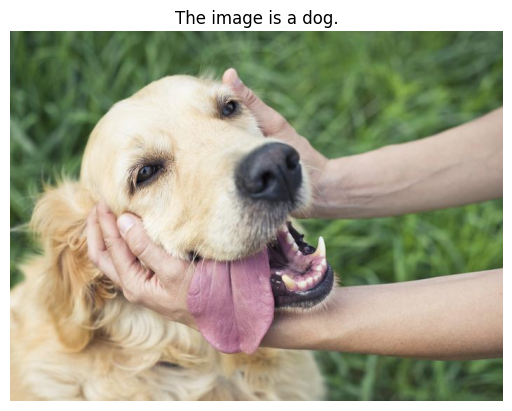

In [40]:
import cv2
import pickle
import matplotlib.pyplot as plt
def preprocess_image(image_path, img_size=(128, 128)):
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    img_resized = cv2.resize(img, img_size)
    img_normalized = img_resized / 255.0
    img_flattened = img_normalized.reshape(1, -1)
    return img, img_flattened

def predict_and_display_image(image_path):
    with open('/content/drive/MyDrive/svm_model.pkl', 'rb') as model_file:
        svm_model = pickle.load(model_file)
    original_img, img = preprocess_image(image_path)
    prediction = svm_model.predict(img)
    categories = ['cat', 'dog']
    result = f"The image is a {categories[prediction[0]]}."
    print(result)
    plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    plt.title(result)
    plt.axis('off')
    plt.show()
image_path = '/content/drive/MyDrive/dogs-vs-cats/test/dogs/dog_181.jpg'
predict_and_display_image(image_path)
